https://www.youtube.com/watch?v=w8yWXqWQYmU&t=1282s Samson Zhang

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c digit-recognizer

mkdir: cannot create directory ‘/root/.kaggle’: File exists
  0% 0.00/15.3M [00:00<?, ?B/s]
100% 15.3M/15.3M [00:00<00:00, 1.32GB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/digit-recognizer.zip", "r")
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
data = pd.read_csv("/content/train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# change to numpy
data_n = np.array(data)
np.random.shuffle(data_n)
m, n = data_n.shape
# transpose
data_train = data_n[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_, m_train = X_train.shape

In [ ]:
def init_params():
  W1 = np.random.rand(10, 784) -0.5
  b1 = np.random.rand(10, 1) -0.5

  W2 = np.random.rand(10, 10) -0.5
  b2 = np.random.rand(10, 1) -0.5

  return W1, b1, W2, b2

In [ ]:
def Relu(Z, d=False):
  """
  0 if z < 0
  z if z >= 0
  """
  if d:
    return Z > 0
  else:
    return np.maximum(Z, 0)

In [ ]:
def one_hot(Y):
  one_hot_Y = np.zeros((Y.size, Y.max() + 1))
  one_hot_Y[np.arange(Y.size), Y] = 1
  return one_hot_Y.T

In [ ]:
def Softmax(Z):
    A = np.exp(Z) / sum(np.exp(Z))
    return A

In [ ]:
def forward_prop(W1, b1, W2, b2, X):
  Z1 = W1.dot(X) + b1
  A1 = Relu(Z1)

  Z2 = W2.dot(A1) + b2
  A2 = Softmax(Z2)

  return Z1, A1, Z2, A2

In [ ]:
def back_prop(Z1, Z2, A1, A2, X, Y, W2):
  one_hot_y = one_hot(Y)
  dZ2 = A2 - one_hot_y
  dW2 = 1 / m * dZ2.dot(A1.T)
  db2 = 1 / m * np.sum(dZ2)
  dZ1 = W2.T.dot(dZ2) * Relu(Z1, d=True)
  dW1 = 1 / m * dZ1.dot(X.T)
  db1 = 1 / m * np.sum(dZ1)

  return dW1, db1, dW2, db2

In [ ]:
def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
  W1 = W1 - alpha * dW1
  b1 = b1 - alpha * db1
  W2 = W2 - alpha * dW2
  b2 = b2 - alpha * db2

  return W1, b1, W2, b2

In [ ]:
def get_predictions(A2):
  return np.argmax(A2, 0)

In [ ]:
def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y) / Y.size

In [ ]:
def gradient_descent(X, Y, alpha, epochs):
  W1, b1, W2, b2 = init_params()
  for i in range(epochs):
      Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
      dW1, db1, dW2, db2 = back_prop(Z1, Z2, A1, A2, X, Y, W2)
      W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
      if i % 10 == 0:
          print("Iteration: ", i)
          predictions = get_predictions(A2)
          print(get_accuracy(predictions, Y))
  return W1, b1, W2, b2

In [ ]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 0.10, 100)

Iteration:  0
[9 1 9 ... 9 5 1] [2 0 9 ... 0 8 1]
0.1464390243902439
Iteration:  10
[6 6 7 ... 6 6 8] [2 0 9 ... 0 8 1]
0.23085365853658538
Iteration:  20
[6 6 7 ... 7 6 8] [2 0 9 ... 0 8 1]
0.31173170731707317
Iteration:  30
[6 0 7 ... 0 6 1] [2 0 9 ... 0 8 1]
0.3898048780487805
Iteration:  40
[3 0 7 ... 0 6 1] [2 0 9 ... 0 8 1]
0.4507317073170732
Iteration:  50
[2 0 7 ... 0 6 1] [2 0 9 ... 0 8 1]
0.5006829268292683
Iteration:  60
[2 0 7 ... 0 5 1] [2 0 9 ... 0 8 1]
0.5411219512195122
Iteration:  70
[2 0 7 ... 0 5 1] [2 0 9 ... 0 8 1]
0.5781951219512195
Iteration:  80
[2 0 7 ... 0 5 1] [2 0 9 ... 0 8 1]
0.6098780487804878
Iteration:  90
[2 0 7 ... 0 5 1] [2 0 9 ... 0 8 1]
0.6375609756097561


In [ ]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)

    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

Prediction:  [3]
Label:  5


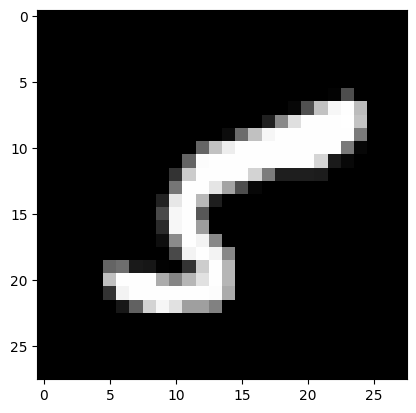

Prediction:  [9]
Label:  7


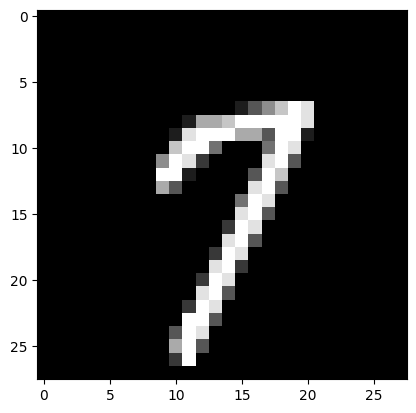

Prediction:  [1]
Label:  1


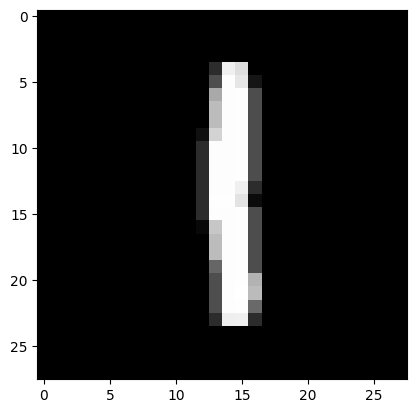

Prediction:  [7]
Label:  7


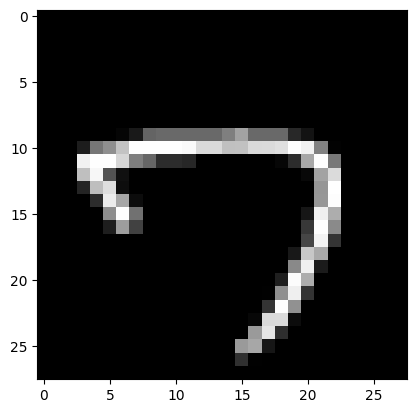

In [ ]:
test_prediction(10, W1, b1, W2, b2)
test_prediction(11, W1, b1, W2, b2)
test_prediction(12, W1, b1, W2, b2)
test_prediction(13, W1, b1, W2, b2)

In [ ]:
import tensorflow as tf
import cv2 as cv

In [ ]:
!kaggle datasets download tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
cat-and-dog.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/cat-and-dog.zip", "r")
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
import random
import os
import matplotlib.image as mpimg

def check_image(name="cats", return_img=False):
  files = os.listdir(f"/content/training_set/training_set/{name}")
  length = len(files)
  r = random.randint(0, length-1)
  img = mpimg.imread(f"/content/training_set/training_set/{name}/{files[r]}")

  if not return_img:
    plt.imshow(img)
    print(img.shape)
  else:
    return img

(269, 357, 3)


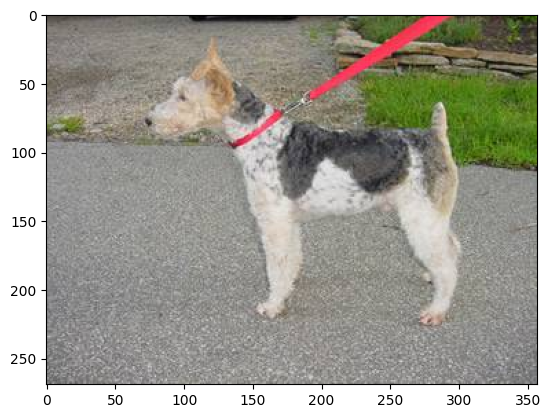

In [ ]:
check_image(name="dogs")

In [ ]:
train_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

test_validatate_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.)

train_data = train_data_generator.flow_from_directory(directory="/content/training_set/training_set",
                                                      batch_size=32,
                                                      target_size=(256, 256),
                                                      class_mode="binary",
                                                      seed=16)
val_data = test_validatate_data_generator.flow_from_directory(directory="/content/test_set/test_set",
                                                      batch_size=32,
                                                      target_size=(256, 256),
                                                      class_mode="binary",
                                                      seed=16)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
"""
Input Layer : (256, 256, 3) -> (x, y, z)
Hidden Layer:
 - conv2d
 - conv2d
 - maxpool2d
 - conv2d
 - maxpool2d
 - flatten
Output Layer: 2 (dog + cat)
"""

model_1 = tf.keras.Sequential([
    # input layer
    tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(256,256,3)),
    tf.keras.layers.MaxPooling2D(2,2),

    # hidden layers
    tf.keras.layers.Conv2D(64, (1, 1), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    # output layers
     # Fully connected layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),  # Regularization
    tf.keras.layers.Dense(1, activation='sigmoid')  # Output layer
])

# Compile the model
model_1.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
    metrics=["accuracy"]
)

steps_per_epoch = train_data.samples // train_data.batch_size
validation_steps = val_data.samples // val_data.batch_size

# Train the model
base_history = model_1.fit(
    train_data,
    epochs=10,
    steps_per_epoch=steps_per_epoch,
    validation_data=val_data,
    validation_steps=validation_steps
)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 32s 112ms/step - accuracy: 0.5300 - loss: 0.6918 - val_accuracy: 0.6250 - val_loss: 0.6581
Epoch 2/10
  1/250 ━━━━━━━━━━━━━━━━━━━━ 15s 63ms/step - accuracy: 0.5312 - loss: 0.6766

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


250/250 ━━━━━━━━━━━━━━━━━━━━ 9s 36ms/step - accuracy: 0.5312 - loss: 0.6766 - val_accuracy: 0.6478 - val_loss: 0.6552
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 31s 116ms/step - accuracy: 0.6353 - loss: 0.6436 - val_accuracy: 0.7188 - val_loss: 0.5925
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - accuracy: 0.8438 - loss: 0.4859 - val_accuracy: 0.7192 - val_loss: 0.5912
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 42s 166ms/step - accuracy: 0.6932 - loss: 0.5874 - val_accuracy: 0.7073 - val_loss: 0.5654
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - accuracy: 0.8438 - loss: 0.4835 - val_accuracy: 0.7073 - val_loss: 0.5634
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 41s 165ms/step - accuracy: 0.7067 - loss: 0.5657 - val_accuracy: 0.7416 - val_loss: 0.5486
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - accuracy: 0.6250 - loss: 0.6153 - val_accuracy: 0.7465 - val_loss: 0.5437
Epoch 9/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 25s 98ms/step - accuracy: 0.7350 - loss: 0.5348 - val_accuracy

In [ ]:
# get image from url
from PIL import Image
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt

def predict_from_url(url):
  response = requests.get(url)
  img = Image.open(BytesIO(response.content))

  # resize image
  img_ = np.array(img)
  img_ = tf.image.resize(img, [256, 256])
  img_ = img_ / 255.0  # Normalize pixel values to [0, 1]
  img_ = np.expand_dims(img_, axis=0)  # Shape becomes (1, 512, 512, 3)
  print(img_.shape)

  # predict with new image
  prediction = model_1.predict(img_)

  if prediction < 0.5:
    print("This is a cat!")
  else:
    print("This is a dog!")
  print(prediction)

  # display image
  img = Image.open(BytesIO(response.content))
  plt.imshow(img)
  plt.show()

(1, 256, 256, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
This is a cat!
[[0.41303053]]


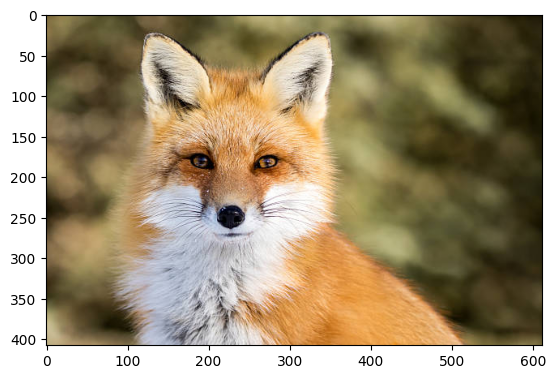

In [ ]:
predict_from_url("https://media.istockphoto.com/id/516318760/photo/red-fox-vulpes-vulpes.jpg?s=612x612&w=0&k=20&c=jelfBarPxOUUjhiRWDtXlDMAUJJqUih3nnTo7HI4zx8=")